In [5]:
import pandas as pd
import glob
import sys
from plotnine import *

In [6]:
# 파일 찾기
inpFile = '{}'.format('./고령인구비율.csv')
fileList = sorted(glob.glob(inpFile))

# 파일 없을 시 오류 처리
if fileList is None or len(fileList) < 1:
    print('[ERROR] inpFile : {} / {}'.format(inpFile, '입력 자료를 확인해주세요.'))
    sys.exit(1)

In [9]:
# 파일 읽기
data = pd.read_csv(fileList[0], encoding='EUC-KR')
data

,행정구역별,날짜,고령인구비율,65세이상인구,전체인구
0,전국,2021.12,17.1,8851033,51638809
1,서울특별시,2021.12,16.8,1597447,9509458
2,부산광역시,2021.12,20.4,681885,3350380
3,대구광역시,2021.12,17.5,417060,2385412
4,인천광역시,2021.12,14.8,435431,2948375
...,...,...,...,...,...
85,전라북도,2022.04,22.6,401617,1780824
86,전라남도,2022.04,24.6,449291,1828550
87,경상북도,2022.04,23.1,605182,2617552
88,경상남도,2022.04,18.8,619531,3300692


In [10]:
# 문자열을 통해 날짜형 변환
data['dtDate'] = pd.to_datetime(data['날짜'].astype(str), format='%Y.%m')

In [11]:
# 행정구역에 따른 평균 수행
dataL1 = data.groupby(['행정구역별']).mean().reset_index()
dataL1

,행정구역별,날짜,고령인구비율,65세이상인구,전체인구
0,강원도,2021.844,21.90,336712.8,1538855.4
1,경기도,2021.844,14.04,1903600.0,13573002.6
2,경상남도,2021.844,18.60,614510.8,3307318.4
3,경상북도,2021.844,22.92,601308.4,2622027.6
4,광주광역시,2021.844,14.92,214874.8,1439731.6
5,대구광역시,2021.844,17.68,420969.2,2381886.4
6,대전광역시,2021.844,15.38,223509.8,1450760.4
7,부산광역시,2021.844,20.60,688175.8,3346073.6
8,서울특별시,2021.844,16.96,1611615.2,9506218.6
9,세종특별자치시,2021.844,10.14,38026.4,375632.6


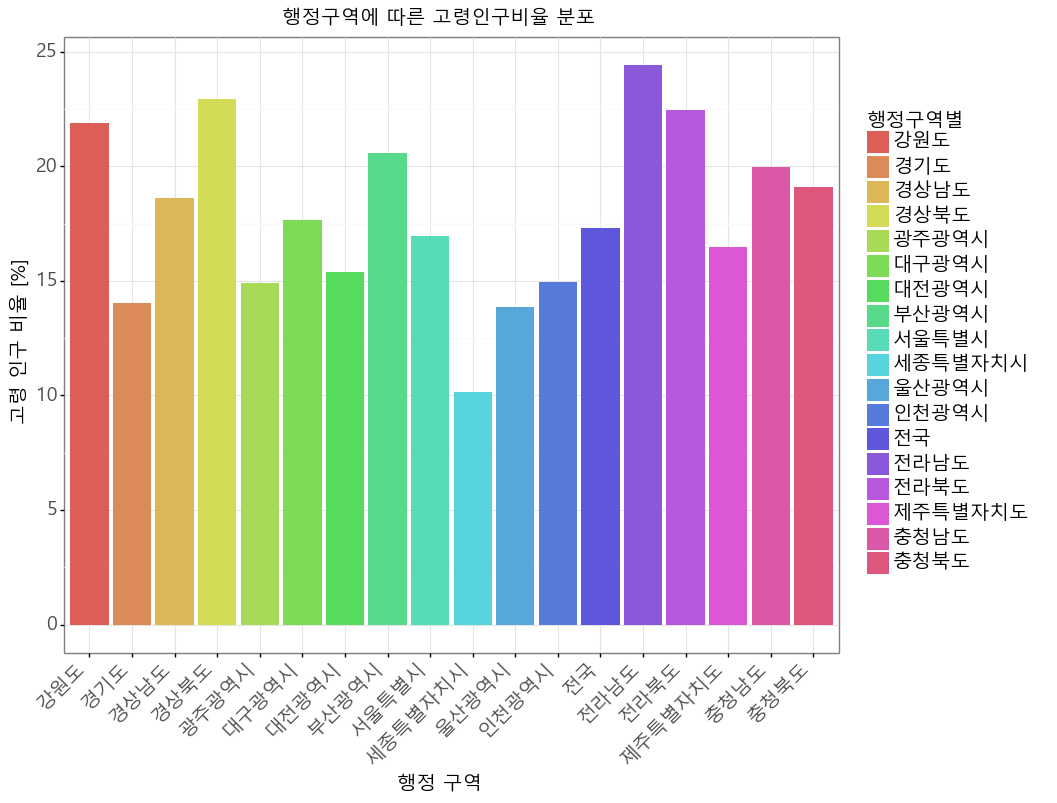

<ggplot: (150324415829)>

In [36]:
# 행정구역에 따른 선 그래프
plot = (
        ggplot(data=dataL1) +
        theme_bw() +
        geom_bar(aes(x='행정구역별', y='고령인구비율', fill='행정구역별'), stat="identity") +
        labs(title='행정구역에 따른 고령인구비율 분포', x='행정 구역', y='고령 인구 비율 [%]') +
        theme(
            text=element_text(family="Malgun Gothic", size=14)
            , axis_text_x=element_text(angle=45, hjust=1)
            , figure_size=(10, 8)
            # , dpi=600
        )
)

plot

In [17]:
# 월별 및 행정구역에 따른 평균 수행
dataL2 = data.groupby(['dtDate', '행정구역별']).mean().reset_index()
dataL2

,dtDate,행정구역별,날짜,고령인구비율,65세이상인구,전체인구
0,2021-12-01,강원도,2021.12,21.7,333176.0,1538492.0
1,2021-12-01,경기도,2021.12,13.9,1881464.0,13565450.0
2,2021-12-01,경상남도,2021.12,18.4,608379.0,3314183.0
3,2021-12-01,경상북도,2021.12,22.7,596312.0,2626609.0
4,2021-12-01,광주광역시,2021.12,14.8,213291.0,1441611.0
...,...,...,...,...,...,...
85,2022-04-01,전라남도,2022.04,24.6,449291.0,1828550.0
86,2022-04-01,전라북도,2022.04,22.6,401617.0,1780824.0
87,2022-04-01,제주특별자치도,2022.04,16.6,112187.0,677413.0
88,2022-04-01,충청남도,2022.04,20.1,426295.0,2119296.0


In [93]:
# 행정구역에 따른 평균 수행
dataL1 = data.groupby(['행정구역별']).mean().reset_index()
dataL1

,행정구역별,고령인구비율
0,강원도,21.90
1,경기도,14.04
2,경상남도,18.60
3,경상북도,22.92
4,광주광역시,14.92
5,대구광역시,17.68
6,대전광역시,15.38
7,부산광역시,20.60
8,서울특별시,16.96
9,세종특별자치시,10.14


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


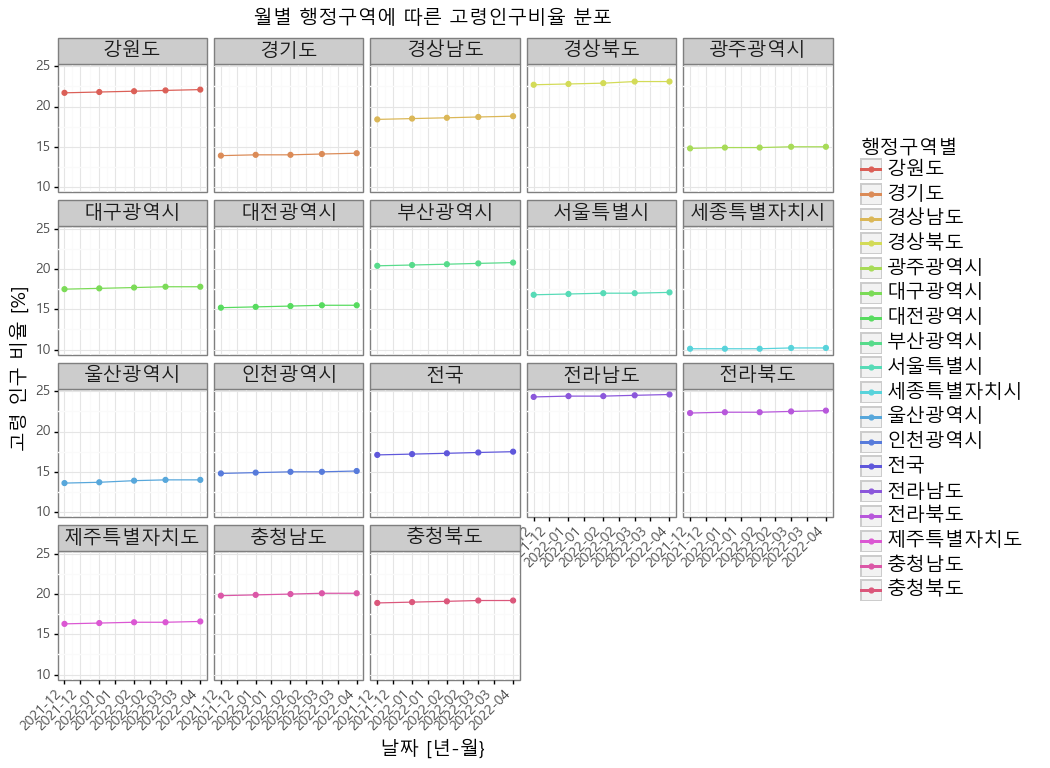

<ggplot: (150326571545)>

In [39]:
# 월별 및 행정구역에 따른 선 그래프
plot = (
        ggplot(data=dataL2) +
        aes(x='dtDate', y='고령인구비율', color='행정구역별') +
        theme_bw() +
        geom_line() +
        geom_point() +
        # coord_flip() +
        labs(title='월별 행정구역에 따른 고령인구비율 분포', x='날짜 [년-월}', y='고령 인구 비율 [%]') +
        scale_x_datetime(date_labels='%Y-%m') +
        theme(
            text=element_text(family="Malgun Gothic", size=14)
            , axis_text_x=element_text(angle=45, hjust=1, size=10)
            , axis_text_y=element_text(size=10)
            , figure_size=(10, 8)
            # , dpi=600
        ) +
        facet_wrap('행정구역별')
)

plot